# Deep Learning
## Assessment 2 part A
### Ronik Jayakumar
### 24680264

## 1.0 Context
In this part, we will be training 3 models, namely the googlenet or inception model, mobilnet model, and nasnet model on the food101 dataset which consists of 101 classes containing a 1000 images each.

## 2.0 Import Packages

In [ ]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylin

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.models as models
from torchvision import models, transforms, datasets
from torchvision import transforms, datasets
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import os
import urllib.request
import tarfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from collections import defaultdict
from PIL import Image
import shutil
import torch.cuda.amp as amp
from torch.optim.lr_scheduler import ReduceLROnPlateau
import timm

## 3.0 Load Dataset
The data has been loaded directly onto google colab to increase processing speed.

In [ ]:
!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz

--2024-04-23 12:47:54--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2024-04-23 12:47:54--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘food-101.tar.gz’

food-101.tar.gz     100%[===================>]   4.65G  30.4MB/s    in 3m 3s   

2024-04-23 12:50:58 (26.0 MB/s) - ‘food-101.tar.gz’ saved [4996278331/4996278331]



## 4.0 Data Exploration

In [ ]:
!tar -xvf food-101.tar.gz

Streaming output truncated to the last 5000 lines.
food-101/images/cannoli/695879.jpg
food-101/images/cannoli/1767088.jpg
food-101/images/cannoli/3201965.jpg
food-101/images/cannoli/3778102.jpg
food-101/images/cannoli/2674065.jpg
food-101/images/cannoli/1169899.jpg
food-101/images/cannoli/1378086.jpg
food-101/images/cannoli/803909.jpg
food-101/images/cannoli/1067240.jpg
food-101/images/cannoli/3002709.jpg
food-101/images/cannoli/2612632.jpg
food-101/images/cannoli/3627612.jpg
food-101/images/cannoli/1798703.jpg
food-101/images/cannoli/560632.jpg
food-101/images/cannoli/512468.jpg
food-101/images/cannoli/2331523.jpg
food-101/images/cannoli/3118302.jpg
food-101/images/cannoli/1499412.jpg
food-101/images/cannoli/1557459.jpg
food-101/images/cannoli/146566.jpg
food-101/images/cannoli/96922.jpg
food-101/images/cannoli/1699562.jpg
food-101/images/cannoli/730051.jpg
food-101/images/cannoli/2177977.jpg
food-101/images/cannoli/2767028.jpg
food-101/images/cannoli/6564.jpg
food-101/images/cannoli/

In [ ]:
%cd food-101/images
!ls -l

/content/food-101/images
total 3640
drwxr-xr-x 2 3156 320 36864 Sep 21  2013 apple_pie
drwxr-xr-x 2 3156 320 36864 Sep 21  2013 baby_back_ribs
drwxr-xr-x 2 3156 320 36864 Sep 21  2013 baklava
drwxr-xr-x 2 3156 320 36864 Sep 21  2013 beef_carpaccio
drwxr-xr-x 2 3156 320 36864 Sep 21  2013 beef_tartare
drwxr-xr-x 2 3156 320 36864 Sep 21  2013 beet_salad
drwxr-xr-x 2 3156 320 36864 Sep 21  2013 beignets
drwxr-xr-x 2 3156 320 36864 Sep 21  2013 bibimbap
drwxr-xr-x 2 3156 320 36864 Sep 21  2013 bread_pudding
drwxr-xr-x 2 3156 320 36864 Sep 21  2013 breakfast_burrito
drwxr-xr-x 2 3156 320 36864 Sep 21  2013 bruschetta
drwxr-xr-x 2 3156 320 36864 Sep 21  2013 caesar_salad
drwxr-xr-x 2 3156 320 36864 Sep 21  2013 cannoli
drwxr-xr-x 2 3156 320 36864 Sep 21  2013 caprese_salad
drwxr-xr-x 2 3156 320 36864 Sep 21  2013 carrot_cake
drwxr-xr-x 2 3156 320 36864 Jul  9  2014 ceviche
drwxr-xr-x 2 3156 320 36864 Sep 21  2013 cheesecake
drwxr-xr-x 2 3156 320 36864 Sep 21  2013 cheese_plate
drwxr-xr-x 2 3

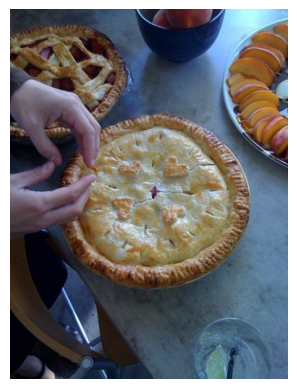

In [ ]:
image_path = 'apple_pie/134.jpg'


img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

## 5.0 Data Splitting
The data exists in separate folders with all images existing in subfolders within the image folder. All the corresponding label names, train image names, and test image names exist in the labels folder as txt and JSON files. Data splitting consists of a series of steps undetaken to associate these files with each other.

### 5.1 Classes with Images
Associate the class.txt file with images folder

In [ ]:
classes_txt_path = '/content/food-101/meta/classes.txt' # Classes File path

with open(classes_txt_path, 'r') as file:
    class_names = [line.strip() for line in file]

images_dir = '/content/food-101/images' # Images File Path

data = {class_name: [] for class_name in class_names}

for root, dirs, files in os.walk(images_dir):
    class_name = os.path.basename(root)
    if class_name in class_names:
        for file in files:
            if file.endswith('.jpg'):
                image_path = os.path.join(root, file)
                data[class_name].append(image_path)

for class_name, images in data.items():
    print(f"Class: {class_name}, Number of images: {len(images)}")

Class: apple_pie, Number of images: 1000
Class: baby_back_ribs, Number of images: 1000
Class: baklava, Number of images: 1000
Class: beef_carpaccio, Number of images: 1000
Class: beef_tartare, Number of images: 1000
Class: beet_salad, Number of images: 1000
Class: beignets, Number of images: 1000
Class: bibimbap, Number of images: 1000
Class: bread_pudding, Number of images: 1000
Class: breakfast_burrito, Number of images: 1000
Class: bruschetta, Number of images: 1000
Class: caesar_salad, Number of images: 1000
Class: cannoli, Number of images: 1000
Class: caprese_salad, Number of images: 1000
Class: carrot_cake, Number of images: 1000
Class: ceviche, Number of images: 1000
Class: cheesecake, Number of images: 1000
Class: cheese_plate, Number of images: 1000
Class: chicken_curry, Number of images: 1000
Class: chicken_quesadilla, Number of images: 1000
Class: chicken_wings, Number of images: 1000
Class: chocolate_cake, Number of images: 1000
Class: chocolate_mousse, Number of images: 1

### 5.2 Train Test Split
The train and test files are split based on the txt names given and are saved at a new directory train_data and test_data.

In [ ]:
images_dir = '/content/food-101/images'
meta_dir = '/content/food-101/meta'
train_txt_path = os.path.join(meta_dir, 'train.txt')
test_txt_path = os.path.join(meta_dir, 'test.txt')
output_train_dir = '/content/train_data' # All train images saved here
output_test_dir = '/content/test_data' # All test images saved here

# Read train.txt and test.txt to get image filenames
def read_image_names(txt_path):
    with open(txt_path, 'r') as file:
        image_names = [line.strip() for line in file]
    return image_names

train_image_names = read_image_names(train_txt_path)
test_image_names = read_image_names(test_txt_path)

# Function to copy/move images based on class labels
def process_images(image_names, output_dir):
    for image_name in image_names:
        class_name, filename = image_name.split('/')
        filename_with_extension = filename + '.jpg'  # Assuming all images are JPEGs
        src_path = os.path.join(images_dir, class_name, filename_with_extension)
        dest_dir = os.path.join(output_dir, class_name)
        os.makedirs(dest_dir, exist_ok=True)
        dest_path = os.path.join(dest_dir, filename_with_extension)
        shutil.copy(src_path, dest_path)

# Process training images
process_images(train_image_names, output_train_dir)

# Process testing images
process_images(test_image_names, output_test_dir)

In [ ]:
def list_directory_contents(directory):
    print(f"Contents of directory '{directory}':")
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        num_images = len(os.listdir(class_dir))
        print(f"Class: {class_name}, Number of images: {num_images}")

# List contents of train_data and test_data directories
list_directory_contents('/content/train_data')
list_directory_contents('/content/test_data')

Contents of directory '/content/train_data':
Class: escargots, Number of images: 750
Class: waffles, Number of images: 750
Class: risotto, Number of images: 750
Class: tacos, Number of images: 750
Class: ramen, Number of images: 750
Class: huevos_rancheros, Number of images: 750
Class: french_toast, Number of images: 750
Class: beet_salad, Number of images: 750
Class: bibimbap, Number of images: 750
Class: oysters, Number of images: 750
Class: hamburger, Number of images: 750
Class: samosa, Number of images: 750
Class: peking_duck, Number of images: 750
Class: gyoza, Number of images: 750
Class: caprese_salad, Number of images: 750
Class: deviled_eggs, Number of images: 750
Class: sashimi, Number of images: 750
Class: spaghetti_bolognese, Number of images: 750
Class: spaghetti_carbonara, Number of images: 750
Class: fish_and_chips, Number of images: 750
Class: seaweed_salad, Number of images: 750
Class: breakfast_burrito, Number of images: 750
Class: carrot_cake, Number of images: 750


## 6.0 Data Preparation

### 6.1 Call back Function
A custom call back class has been introduced to implement an early stopping function into the model. This is to ensure that no time is wasted running epochs that dont show any signs of increased accuracy or reduced losses.

In [ ]:
class CustomCallback:
    def __init__(self, early_stop_patience=5, reduce_lr_factor=0.2, reduce_lr_patience=3, reduce_lr_min_lr=0.0000001, checkpoint_path='checkpoint.pth', log_dir='logs'):
        self.early_stop_patience = early_stop_patience  # Patience for early stopping
        self.reduce_lr_factor = reduce_lr_factor  # Factor by which to reduce learning rate
        self.reduce_lr_patience = reduce_lr_patience  # Patience for reducing learning rate
        self.reduce_lr_min_lr = reduce_lr_min_lr  # Minimum learning rate
        self.checkpoint_path = checkpoint_path  # Path to save model checkpoints
        # self.log_dir = log_dir  # Directory for logging

        self.early_stop_counter = 0  # Counter for early stopping
        self.best_val_loss = float('inf')  # Best validation loss

        self.optimizer = None  # Optimizer for training
        self.scheduler = None  # Learning rate scheduler

    def set_optimizer(self, optimizer):
        self.optimizer = optimizer

    def on_epoch_end(self, epoch, val_loss):
        if val_loss < self.best_val_loss: # Early stopping
            self.best_val_loss = val_loss
            self.early_stop_counter = 0  # Reset counter if validation loss improves
        else:
            self.early_stop_counter += 1  # Increment counter if validation loss does not improve

        if self.early_stop_counter >= self.early_stop_patience:
            print("Early stopping triggered!")
            return True  # Stop training if early stopping criterion is met

        if self.scheduler is not None:
            self.scheduler.step(val_loss)  # Adjust learning rate based on validation loss

        return False  # Continue training

    def on_train_begin(self):
        self.scheduler = ReduceLROnPlateau(self.optimizer, mode='min', factor=self.reduce_lr_factor,
                                            patience=self.reduce_lr_patience, min_lr=self.reduce_lr_min_lr)

    def on_train_end(self):
        pass

    def set_model(self, model):
        self.model = model

### 6.2 Data Size Reduction
Due to existing computation limitations, the overall size of the dataset has been reduced to 5 classes for testing the efficiency of each model.

In [ ]:
import random
train_dir = '/content/train_data'
test_dir = '/content/test_data'

selected_train_dir = '/content/selected_train_data' # Directory for saving new reduced train dataset
selected_test_dir = '/content/selected_test_data' # Directory for saving new reduced test dataset

if os.path.exists(selected_train_dir):
    shutil.rmtree(selected_train_dir)
if os.path.exists(selected_test_dir):
    shutil.rmtree(selected_test_dir)
os.makedirs(selected_train_dir, exist_ok=True)
os.makedirs(selected_test_dir, exist_ok=True)

num_selected_classes = 5

all_classes = os.listdir(train_dir)

selected_classes = random.sample(all_classes, num_selected_classes)

for class_name in selected_classes:
    src_train_class_dir = os.path.join(train_dir, class_name)
    dest_train_class_dir = os.path.join(selected_train_dir, class_name)
    shutil.copytree(src_train_class_dir, dest_train_class_dir)

    src_test_class_dir = os.path.join(test_dir, class_name)
    dest_test_class_dir = os.path.join(selected_test_dir, class_name)
    shutil.copytree(src_test_class_dir, dest_test_class_dir)

print("Selected classes copied to new directories successfully.")

Selected classes copied to new directories successfully.


In [ ]:
# List the reduced dataset used for model training in Part A
list_directory_contents('/content/selected_train_data')
list_directory_contents('/content/selected_test_data')

Contents of directory '/content/selected_train_data':
Class: ice_cream, Number of images: 750
Class: cheese_plate, Number of images: 750
Class: deviled_eggs, Number of images: 750
Class: beef_carpaccio, Number of images: 750
Class: garlic_bread, Number of images: 750
Contents of directory '/content/selected_test_data':
Class: ice_cream, Number of images: 250
Class: cheese_plate, Number of images: 250
Class: deviled_eggs, Number of images: 250
Class: beef_carpaccio, Number of images: 250
Class: garlic_bread, Number of images: 250


## 7.0 Googlenet Model
The first model that is being trained is the Googlenet model. Given below are the list of preprocessing and model training steps required for the same.

In [ ]:
# Transform all the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),           # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize images
])

In [ ]:
# Access the training and testing folders
train_dataset = ImageFolder(root='/content/selected_train_data', transform=transform)
test_dataset = ImageFolder(root='/content/selected_test_data', transform=transform)

In [ ]:
# make them accessible for the training and testing loops using DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, num_workers=0, pin_memory=True, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, num_workers=0, pin_memory=True, shuffle=False)

In [ ]:
# Initiate the GoogleNet model
googlenet_model = models.googlenet(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth
100%|██████████| 49.7M/49.7M [00:01<00:00, 51.5MB/s]


In [ ]:
# Add the 3 fully connected layers with the third layer giving us the output. A global average pooling layer exists in the head
num_features = googlenet_model.fc.in_features
googlenet_model.fc = nn.Sequential(
    nn.Linear(num_features, 512), # FC layer 1
    nn.ReLU(inplace=True),
    nn.Dropout(0.5),
    nn.Linear(512, 256), # FC layer 2
    nn.ReLU(inplace=True),
    nn.Dropout(0.5),
    nn.Linear(256, 5) # FC layer 3 giving us the output
)

In [ ]:
optimizer = optim.Adam(googlenet_model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
googlenet_model.to(device)

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [ ]:
scaler = amp.GradScaler()

/usr/local/lib/python3.10/dist-packages/torch/cuda/amp/grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


In [ ]:
# Train and Test the GoogleNet model
train_loss_history = []
train_accuracy_history = []
test_loss_history = []
test_accuracy_history = []

# Training loop
def train(model, train_loader, optimizer, criterion, device):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # Zero the parameter gradients

        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize

        running_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / total
    train_accuracy = correct / total

    return train_loss, train_accuracy

# Evaluation loop
def evaluate(model, test_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss

            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    test_loss = running_loss / total
    test_accuracy = correct / total

    return test_loss, test_accuracy

# Training and evaluation
num_epochs = 10

for epoch in range(num_epochs):
    train_loss, train_accuracy = train(googlenet_model, train_loader, optimizer, criterion, device)
    test_loss, test_accuracy = evaluate(googlenet_model, test_loader, criterion, device)

    # Save the metrics
    train_loss_history.append(train_loss)
    train_accuracy_history.append(train_accuracy)
    test_loss_history.append(test_loss)
    test_accuracy_history.append(test_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}]")
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {100 * train_accuracy:.2f}%")
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {100 * test_accuracy:.2f}%")

Epoch [1/10]
Train Loss: 0.7203, Train Accuracy: 74.35%
Test Loss: 0.5329, Test Accuracy: 80.64%
Epoch [2/10]
Train Loss: 0.4767, Train Accuracy: 84.96%
Test Loss: 0.6890, Test Accuracy: 83.28%
Epoch [3/10]
Train Loss: 0.3554, Train Accuracy: 88.27%
Test Loss: 0.3096, Test Accuracy: 89.60%
Epoch [4/10]
Train Loss: 0.3467, Train Accuracy: 89.23%
Test Loss: 0.9386, Test Accuracy: 72.96%
Epoch [5/10]
Train Loss: 0.3547, Train Accuracy: 88.85%
Test Loss: 0.3525, Test Accuracy: 87.84%
Epoch [6/10]
Train Loss: 0.2803, Train Accuracy: 91.07%
Test Loss: 1.9237, Test Accuracy: 70.40%
Epoch [7/10]
Train Loss: 0.2472, Train Accuracy: 92.27%
Test Loss: 0.2768, Test Accuracy: 90.88%
Epoch [8/10]
Train Loss: 0.2388, Train Accuracy: 93.04%
Test Loss: 0.4831, Test Accuracy: 86.40%
Epoch [9/10]
Train Loss: 0.1868, Train Accuracy: 94.75%
Test Loss: 0.2931, Test Accuracy: 90.16%
Epoch [10/10]
Train Loss: 0.2242, Train Accuracy: 93.84%
Test Loss: 0.1921, Test Accuracy: 93.52%


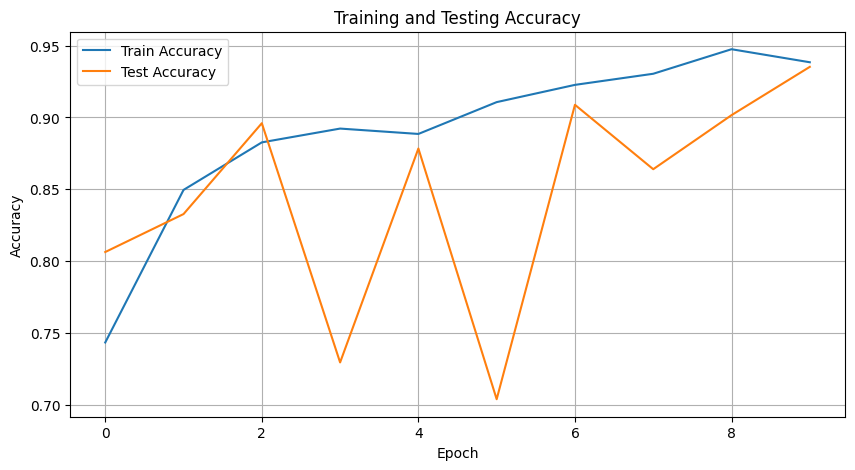

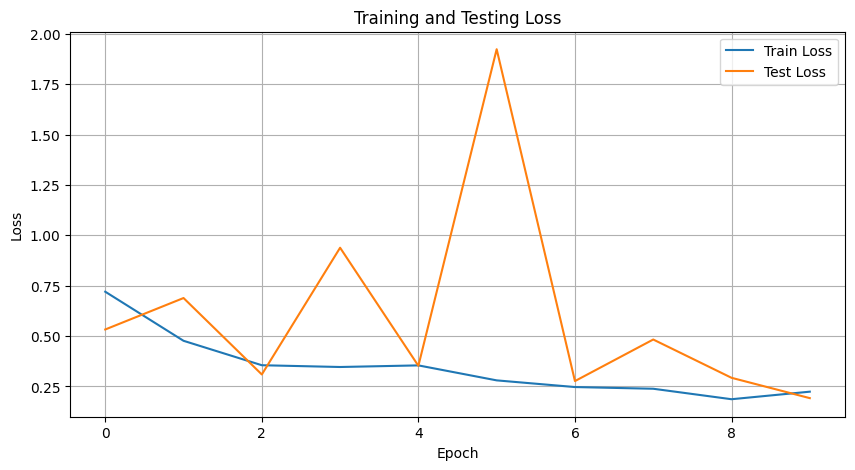

In [ ]:
# Plot the epochs to get a visual representation
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy_history, label='Train Accuracy')
plt.plot(test_accuracy_history, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(train_loss_history, label='Train Loss')
plt.plot(test_loss_history, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.grid(True)
plt.show()

From the GoogleNet model, we notice the following features:
1. The training and testing accuracies start off at 74% and 80% at epoch 1 and reach a higher accuracy of close to 94% each by epoch 10.
2. The increase in accuracy and decrease in loss for the training set is quite linear but is scattered with the testing set. This could indicate a small amount of overfitting.
3. This could also be due to the decision of not freezing layers so as to get an indication of how the model performs. This will further be explored into in Part B.

## 8.0 Mobilenet V3
The second model that we will be looking into is the MobileNetV3 model.

In [ ]:
# Initiate the MobileNet V3 model
mobilenet_model = models.mobilenet_v3_small(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth
100%|██████████| 9.83M/9.83M [00:00<00:00, 56.2MB/s]


In [ ]:
# Transform all the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),           # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize images
])

In [ ]:
train_dataset = ImageFolder(root='/content/selected_train_data', transform=transform)
test_dataset = ImageFolder(root='/content/selected_test_data', transform=transform)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=64, num_workers=0, pin_memory=True, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, num_workers=0, pin_memory=True, shuffle=False)

In [ ]:
# 3 Fully Connected layers initiated. The Golbal Average pooling layer exists in the head
num_features = mobilenet_model.classifier[0].in_features
mobilenet_model.classifier = nn.Sequential(
    nn.Linear(num_features, 512), # FC layer 1
    nn.ReLU(inplace=True),
    nn.Dropout(0.5),
    nn.Linear(512, 256), # FC layer 2
    nn.ReLU(inplace=True),
    nn.Dropout(0.5),
    nn.Linear(256, 5) # FC layer 3 with the output
)

In [ ]:
# Initialse the Loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mobilenet_model.parameters(), lr=0.001)

In [ ]:
# Initialise the defined Callback class
callback = CustomCallback()
callback.set_optimizer(optimizer)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
mobilenet_model.to(device)

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 

In [ ]:
# Perform training and testing over the defined MobileNetV3 model
train_loss_history = []
train_accuracy_history = []
test_loss_history = []
test_accuracy_history = []

# Training loop
def train(model, train_loader, optimizer, criterion, device, callback):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # Zero the parameter gradients

        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize

        running_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / total
    train_accuracy = correct / total

    return train_loss, train_accuracy

# Evaluation loop
def evaluate(model, test_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss

            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    test_loss = running_loss / total
    test_accuracy = correct / total

    return test_loss, test_accuracy

# Training and evaluation
num_epochs = 10

for epoch in range(num_epochs):
    train_loss, train_accuracy = train(mobilenet_model, train_loader, optimizer, criterion, device, callback)
    test_loss, test_accuracy = evaluate(mobilenet_model, test_loader, criterion, device)

    # Save the metrics
    train_loss_history.append(train_loss)
    train_accuracy_history.append(train_accuracy)
    test_loss_history.append(test_loss)
    test_accuracy_history.append(test_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}]")
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {100 * train_accuracy:.2f}%")
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {100 * test_accuracy:.2f}%")

Epoch [1/10]
Train Loss: 0.8499, Train Accuracy: 67.97%
Test Loss: 1.0327, Test Accuracy: 74.56%
Epoch [2/10]
Train Loss: 0.3371, Train Accuracy: 89.09%
Test Loss: 1.7076, Test Accuracy: 67.04%
Epoch [3/10]
Train Loss: 0.2317, Train Accuracy: 92.77%
Test Loss: 0.4735, Test Accuracy: 87.28%
Epoch [4/10]
Train Loss: 0.1678, Train Accuracy: 95.07%
Test Loss: 0.4760, Test Accuracy: 86.40%
Epoch [5/10]
Train Loss: 0.1221, Train Accuracy: 96.32%
Test Loss: 1.0095, Test Accuracy: 80.96%
Epoch [6/10]
Train Loss: 0.0804, Train Accuracy: 97.57%
Test Loss: 0.7520, Test Accuracy: 84.96%
Epoch [7/10]
Train Loss: 0.1156, Train Accuracy: 96.21%
Test Loss: 0.8315, Test Accuracy: 83.28%
Epoch [8/10]
Train Loss: 0.0772, Train Accuracy: 97.57%
Test Loss: 0.6115, Test Accuracy: 86.48%
Epoch [9/10]
Train Loss: 0.0839, Train Accuracy: 97.79%
Test Loss: 0.8128, Test Accuracy: 80.80%
Epoch [10/10]
Train Loss: 0.0551, Train Accuracy: 98.43%
Test Loss: 0.7089, Test Accuracy: 84.88%


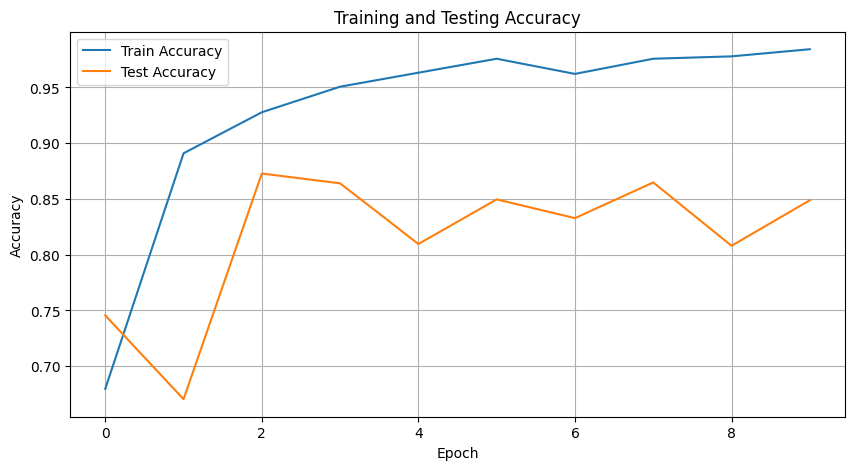

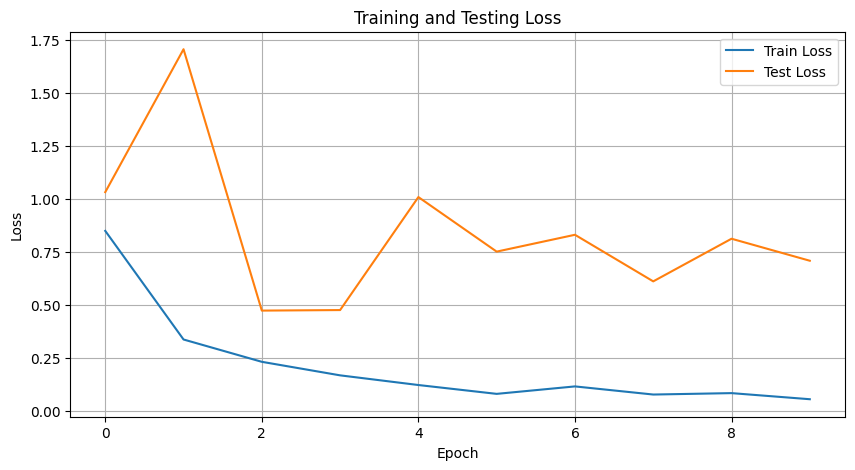

In [ ]:
# Visualise the results by plotting the results of the epochs
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy_history, label='Train Accuracy')
plt.plot(test_accuracy_history, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(train_loss_history, label='Train Loss')
plt.plot(test_loss_history, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.grid(True)
plt.show()

From the above results, the following points are noticed:
1. The training and testing accuracies start off at 68% and 75% at epoch 1 and reach a higher accuracy of 98% and 85% by epoch 10.
2. The increase in accuracy and decrease in loss for the training set is quite linear but is scattered with the testing set. This could indicate a small amount of overfitting.
3. This could also be due to the decision of not freezing layers so as to get an indication of how the model performs. This will further be explored into in Part B.

## 9.0 Nasnet
The 3rd and final model trained in this part of the project is the NasNet model.

In [ ]:
transform_nasnet = transforms.Compose([
    transforms.Resize((331, 331)), # Nasnet requires the inages to be resized to 331 each
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
train_dataset = ImageFolder(root='/content/selected_train_data', transform=transform_nasnet)
test_dataset = ImageFolder(root='/content/selected_test_data', transform=transform_nasnet)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, num_workers=0, pin_memory=True, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, num_workers=0, pin_memory=True, shuffle=False)

In [ ]:
# import nasnet using Pytorch Image Models or Timm
nasnet_model = timm.create_model('nasnetalarge', pretrained=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/356M [00:00<?, ?B/s]

In [ ]:
# Add 3 fully connected layers to the existing global average pooling layer in the Head
num_input_features = 4032

nasnet_model.last_linear = nn.Sequential(
    nn.Linear(num_input_features, 512), # FC layer 1
    nn.ReLU(inplace=True),
    nn.Dropout(0.5),
    nn.Linear(512, 256), # FC layer 2
    nn.ReLU(inplace=True),
    nn.Dropout(0.5),
    nn.Linear(256, 5) # FC layer 3 giving the output
)

In [ ]:
optimizer = optim.Adam(nasnet_model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
nasnet_model.to(device)

NASNetALarge(
  (conv0): ConvNormAct(
    (conv): Conv2d(3, 96, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNormAct2d(
      96, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): Identity()
    )
  )
  (cell_stem_0): CellStem0(
    (conv_1x1): ActConvBn(
      (act): ReLU()
      (conv): Conv2d(96, 42, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(42, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (comb_iter_0_left): BranchSeparables(
      (act_1): ReLU()
      (separable_1): SeparableConv2d(
        (depthwise_conv2d): Conv2dSame(42, 42, kernel_size=(5, 5), stride=(2, 2), groups=42, bias=False)
        (pointwise_conv2d): Conv2d(42, 42, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
      (bn_sep_1): BatchNorm2d(42, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (act_2): ReLU(inplace=True)
      (separable_2): SeparableConv2d(
       

In [ ]:
callback = CustomCallback()
callback.set_optimizer(optimizer)

In [ ]:
torch.cuda.empty_cache()

In [ ]:
PYTORCH_CUDA_ALLOC_CONF=expandable_segments = True

In [ ]:
# Train and evaluate the NasNet model
train_loss_history = []
train_accuracy_history = []
test_loss_history = []
test_accuracy_history = []

# Training loop
def train(model, train_loader, optimizer, criterion, device, callback):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # Zero the parameter gradients

        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize

        running_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

        torch.cuda.empty_cache()

    train_loss = running_loss / total
    train_accuracy = correct / total

    return train_loss, train_accuracy

# Evaluation loop
def evaluate(model, test_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss

            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    test_loss = running_loss / total
    test_accuracy = correct / total

    return test_loss, test_accuracy

# The model will be run over 4 epochs due to the extremely high training time
num_epochs = 4

for epoch in range(num_epochs):
    train_loss, train_accuracy = train(nasnet_model, train_loader, optimizer, criterion, device, callback)
    test_loss, test_accuracy = evaluate(nasnet_model, test_loader, criterion, device)

    # Save the metrics
    train_loss_history.append(train_loss)
    train_accuracy_history.append(train_accuracy)
    test_loss_history.append(test_loss)
    test_accuracy_history.append(test_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}]")
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {100 * train_accuracy:.2f}%")
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {100 * test_accuracy:.2f}%")

Epoch [1/5]
Train Loss: 0.6986, Train Accuracy: 78.72%
Test Loss: 0.1957, Test Accuracy: 93.84%
Epoch [2/5]
Train Loss: 0.1942, Train Accuracy: 94.21%
Test Loss: 0.1790, Test Accuracy: 94.24%
Epoch [3/5]
Train Loss: 0.0969, Train Accuracy: 97.12%
Test Loss: 0.1992, Test Accuracy: 94.80%
Epoch [4/5]
Train Loss: 0.0726, Train Accuracy: 98.21%
Test Loss: 0.2408, Test Accuracy: 93.76%


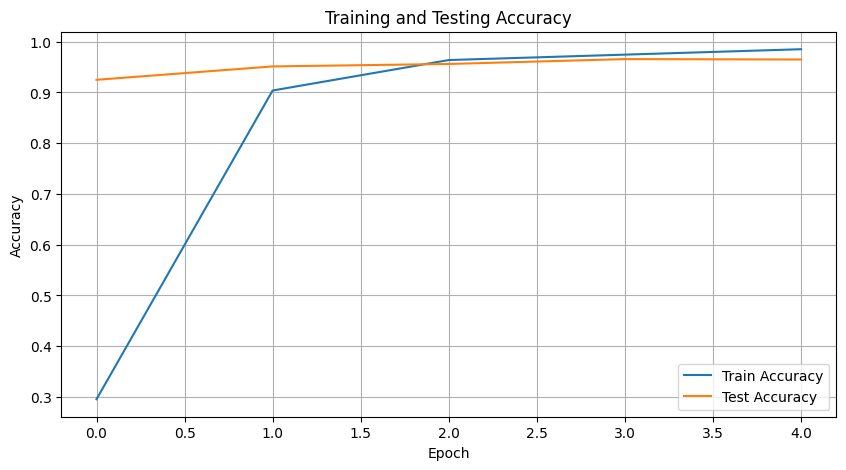

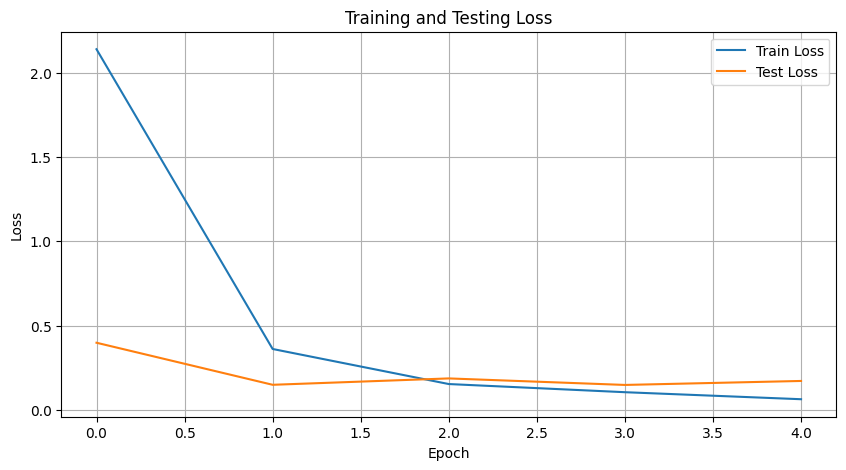

In [ ]:
# Display the results of the NasNet Model
# Training and Testing Accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy_history, label='Train Accuracy')
plt.plot(test_accuracy_history, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#Training and Tesing Losses
plt.figure(figsize=(10, 5))
plt.plot(train_loss_history, label='Train Loss')
plt.plot(test_loss_history, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.grid(True)
plt.show()

The results of the Nasnet model are as follows:
1. The accuracies and losses are a lot more linear as compared to the other two models with smooth moving lines through the generated epochs.
2. The model performs very well with a final training accuracy of 98% and test accuracy of 94%